In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_pd_data.csv', parse_dates=['FirstSubmissionTime', 'LastSubmissionTime'])
df.sample(5)

,brand,pd_id,Name,Description,AverageOverallRating,FirstSubmissionTime,LastSubmissionTime,Age_35to44,Age_18to24,Age_25to34,...,category,love_count,reviews_count,Price,category_1,category_2,category_3,size_oz,size_mL,size_g
106,the-beauty-chef,P447605,Well Spray Ingestible Probiotic & Inner Beauty...,"Beauty Benefit: Immune Support, Hair, Skin, an...",4.0000,2019-08-08 20:46:36,2020-06-09 14:23:04,0.0,0.0,0.0,...,"Skincare, Wellness, Beauty Supplements",600.0,3.0,29.0,Skincare,Wellness,Beauty Supplements,1.000,30.0,NaN
2268,wander-beauty,P407105,Frame Your Face Micro Brow Pencil,"What it is: A precise and ultra-fine, automati...",4.5273,2016-03-03 05:31:09,2020-06-11 05:51:23,4.0,5.0,7.0,...,Makeup,3583.0,55.0,21.0,Makeup,NaN,NaN,0.003,NaN,0.09
1346,melt-cosmetics,P444549,Allday Everyday Lipliner Nudist,"What it is: A long-wearing, waterproof lip pen...",4.6400,2019-05-14 23:37:12,2020-06-30 22:26:59,1.0,0.0,3.0,...,"Makeup, Lip, Lip Liner",10337.0,25.0,17.0,Makeup,Lip,Lip Liner,0.400,NaN,1.20
698,ghd,P454987,Helios Professional Hairdryer Plum,"What it is: A light, fast, professional hair d...",4.6000,2020-04-03 00:10:47,2020-05-31 19:11:20,0.0,0.0,1.0,...,"Hair, Hair Tools, Hair Dryers",723.0,5.0,249.0,Hair,Hair Tools,Hair Dryers,NaN,NaN,NaN
2015,summer-fridays,P440504,R + R Mask,What it is: A two-in-one mask to buff skin bri...,3.8337,2019-02-02 01:17:44,2020-07-05 13:44:51,6.0,12.0,15.0,...,Skincare,41091.0,428.0,52.0,Skincare,NaN,NaN,2.250,NaN,64.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   brand                 2301 non-null   object        
 1   pd_id                 2301 non-null   object        
 2   Name                  2301 non-null   object        
 3   Description           2301 non-null   object        
 4   AverageOverallRating  2301 non-null   float64       
 5   FirstSubmissionTime   2301 non-null   datetime64[ns]
 6   LastSubmissionTime    2301 non-null   datetime64[ns]
 7   Age_35to44            2301 non-null   float64       
 8   Age_18to24            2301 non-null   float64       
 9   Age_25to34            2301 non-null   float64       
 10  Age_45to54            2301 non-null   float64       
 11  Age_over54            2301 non-null   float64       
 12  Age_13to17            2301 non-null   float64       
 13  category          

# Problem

Assuming we are a Makeup/Skincare companies, we hope to invest on a new product sold on Sephora. So here are some problems that need to be answered.<br>

- **What categories have the largest market?**
- **For the category with the largest market, how to price the product?**
- **Assume we are going to sell a product on Sephora, how to predict its popularity?**

Assuming we are Sephora, problems are like:
- **what product we can recommend for each customer? <br>** (Recommendation)

Assuming we are the consumers, problems are like:
- **what skin care/ makeup product we should choose given our age and skin type? <br>** (NLP/Recommendation)

# EDA for choosing new product categories

## What categories have the largest market?

In [4]:
# General Market
df.groupby('category_1').sum()[
    ['love_count', 'reviews_count']].sort_values(
    ['love_count', 'reviews_count'], 
    ascending=False)

,love_count,reviews_count
category_1,,
Makeup,35216246.0,714240.0
Skincare,20160241.0,417586.0
Hair,3893471.0,71492.0
Fragrance,3758445.0,81921.0
Mini Size,1588094.0,53318.0
Bath & Body,1226657.0,25043.0
Tools & Brushes,141853.0,3110.0
Men,96594.0,2349.0


In [5]:
# By Age Group
by_age = df.groupby('category_1').sum()[['Age_13to17', 'Age_18to24', 'Age_25to34', 
                                         'Age_35to44', 'Age_45to54', 'Age_over54']]
by_age_pct = by_age/by_age.sum()*100
cm_yellow = sns.light_palette("blue", as_cmap=True)
by_age_pct = by_age_pct.style.background_gradient(cmap=cm_yellow)
by_age_pct

,Age_13to17,Age_18to24,Age_25to34,Age_35to44,Age_45to54,Age_over54
category_1,,,,,,
Bath & Body,0.716953,1.219542,1.850973,2.388585,3.007929,3.300808
Fragrance,7.771969,7.428044,7.996113,8.708627,7.920662,6.271535
Hair,1.901917,2.451126,3.693943,3.996612,4.047707,4.707994
Makeup,65.606174,63.012324,57.828908,56.962471,60.464405,58.001564
Men,0.069704,0.211955,0.376711,0.393537,0.393193,0.295335
Mini Size,3.206373,3.611256,3.141738,2.991921,2.844099,3.196572
Skincare,20.418223,21.745414,24.740618,24.236383,20.939732,23.852680
Tools & Brushes,0.308688,0.320340,0.370995,0.321866,0.382271,0.373512


Here shows that there are the most attention from the customers on Makeup and Skincare these two categories. 

In [6]:
# The Average price / Love_count / Reviews_count For each product
stat_market = df.groupby('category_1').agg({'Price':['max','mean', 'median'], 
                                            'love_count': ['max','mean', 'median'],
                                            'reviews_count': ['max','mean', 'median']}).round(2).astype('int')
cm = sns.light_palette("green", as_cmap=True)
stat_market = stat_market.style.background_gradient(cmap=cm)
stat_market

As for price, fragrance price higher the others on average, followed by Skincare.
But when it comes to love_count and reviews_count, Makeup product apparently receives more attention than others. 
Skincare and mini size products are also popular. 

**Summary**: In general, Makeup products share the largest market on Sephora's website. Given that the mean price for this category is not high, it seems easier to start business from Makeup product, especially for small companies.

## For the category with the largest market (Makeup), how to price the product?

In [7]:
makeup_df = df.loc[df['category_1']=='Makeup']
makeup_df.sample(5)

,brand,pd_id,Name,Description,AverageOverallRating,FirstSubmissionTime,LastSubmissionTime,Age_35to44,Age_18to24,Age_25to34,...,category,love_count,reviews_count,Price,category_1,category_2,category_3,size_oz,size_mL,size_g
449,deborah-lippmann,P458743,Cuticle Protection & Repair Set,"What it is: A convenient, commuter-friendly cu...",3.0000,2020-06-12 00:39:42,2020-06-12 00:39:42,0.0,0.0,1.0,...,"Makeup, Nail",1263.0,1.0,48.0,Makeup,Nail,NaN,NaN,NaN,NaN
1224,lilah-b,P444317,Lovingly Lip™ Tinted Lip Oil b.remarkable,What it is: A luxurious lip oil formula which ...,3.9118,2019-05-21 18:09:07,2020-06-22 05:47:59,2.0,1.0,3.0,...,"Makeup, Lip, Lip Gloss",14666.0,68.0,30.0,Makeup,Lip,Lip Gloss,NaN,3.5,NaN
1461,nars,P448502,Lipstick Belle De Jour,What it is: A new lineup of long-lasting lipst...,4.2000,2019-08-01 16:11:24,2020-07-05 19:32:58,10.0,6.0,10.0,...,Makeup,75561.0,221.0,26.0,Makeup,NaN,NaN,0.12,NaN,NaN
912,it-cosmetics,P411396,Superhero Elastic Stretch Volumizing and Lengt...,What it is: A volumizing and lengthening masca...,3.7791,2016-09-08 03:17:08,2020-07-01 20:57:03,46.0,51.0,110.0,...,"Makeup, Eye, Mascara",33822.0,1504.0,25.0,Makeup,Eye,Mascara,0.30,NaN,9.0
2226,violet-voss,P429925,Like A Boss - PRO Eyeshadow Palette,What it is: A lavish eyeshadow palette with 20...,4.6609,2018-02-28 01:55:56,2020-04-12 04:13:55,3.0,4.0,14.0,...,"Makeup, Eye, Eye Palettes",29372.0,174.0,45.0,Makeup,Eye,Eye Palettes,NaN,NaN,NaN


### Price distribution

[]

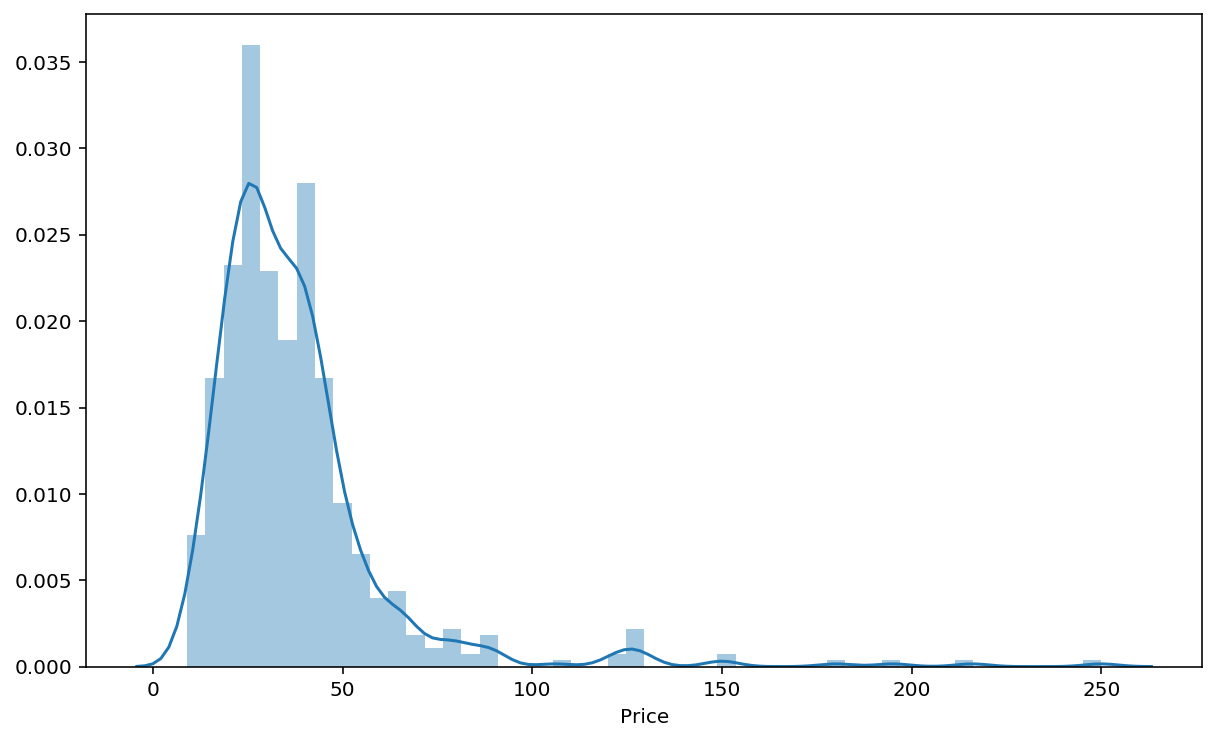

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(makeup_df['Price'])
plt.plot()

### Price and subcategory

In [9]:
makeup_df.groupby('category_2')['Price'].mean().sort_values(ascending=False)

category_2
 Value & Gift Sets        71.625000
 Brushes & Applicators    62.950000
 Makeup Palettes          53.500000
 Eye                      39.620968
 Face                     38.926667
 Cheek                    33.923077
 Nail                     31.642857
 Accessories              27.900000
 Lip                      27.708861
 Mini Size                19.400000
Name: Price, dtype: float64

Except for "Value & Gift Sets" and "Mini Size" products, "Brushes & Applicators" and "Makeup Palettes" price higher on average. Instead, prices for "Lip" are lowest and look more accessible.

### Price and brand

In [10]:
makeup_df.groupby('brand')['Price'].mean().sort_values(ascending=False).head(10)

brand
lancer                        150.000000
la-mer                        120.000000
artis                         104.000000
christian-louboutin-beauty     80.714286
surratt-beauty                 74.200000
natasha-denona                 71.300000
koh-gen-do                     66.000000
tom-ford                       66.000000
viseart                        57.500000
pat-mcgrath-labs               55.100000
Name: Price, dtype: float64

### Price and love counts

[]

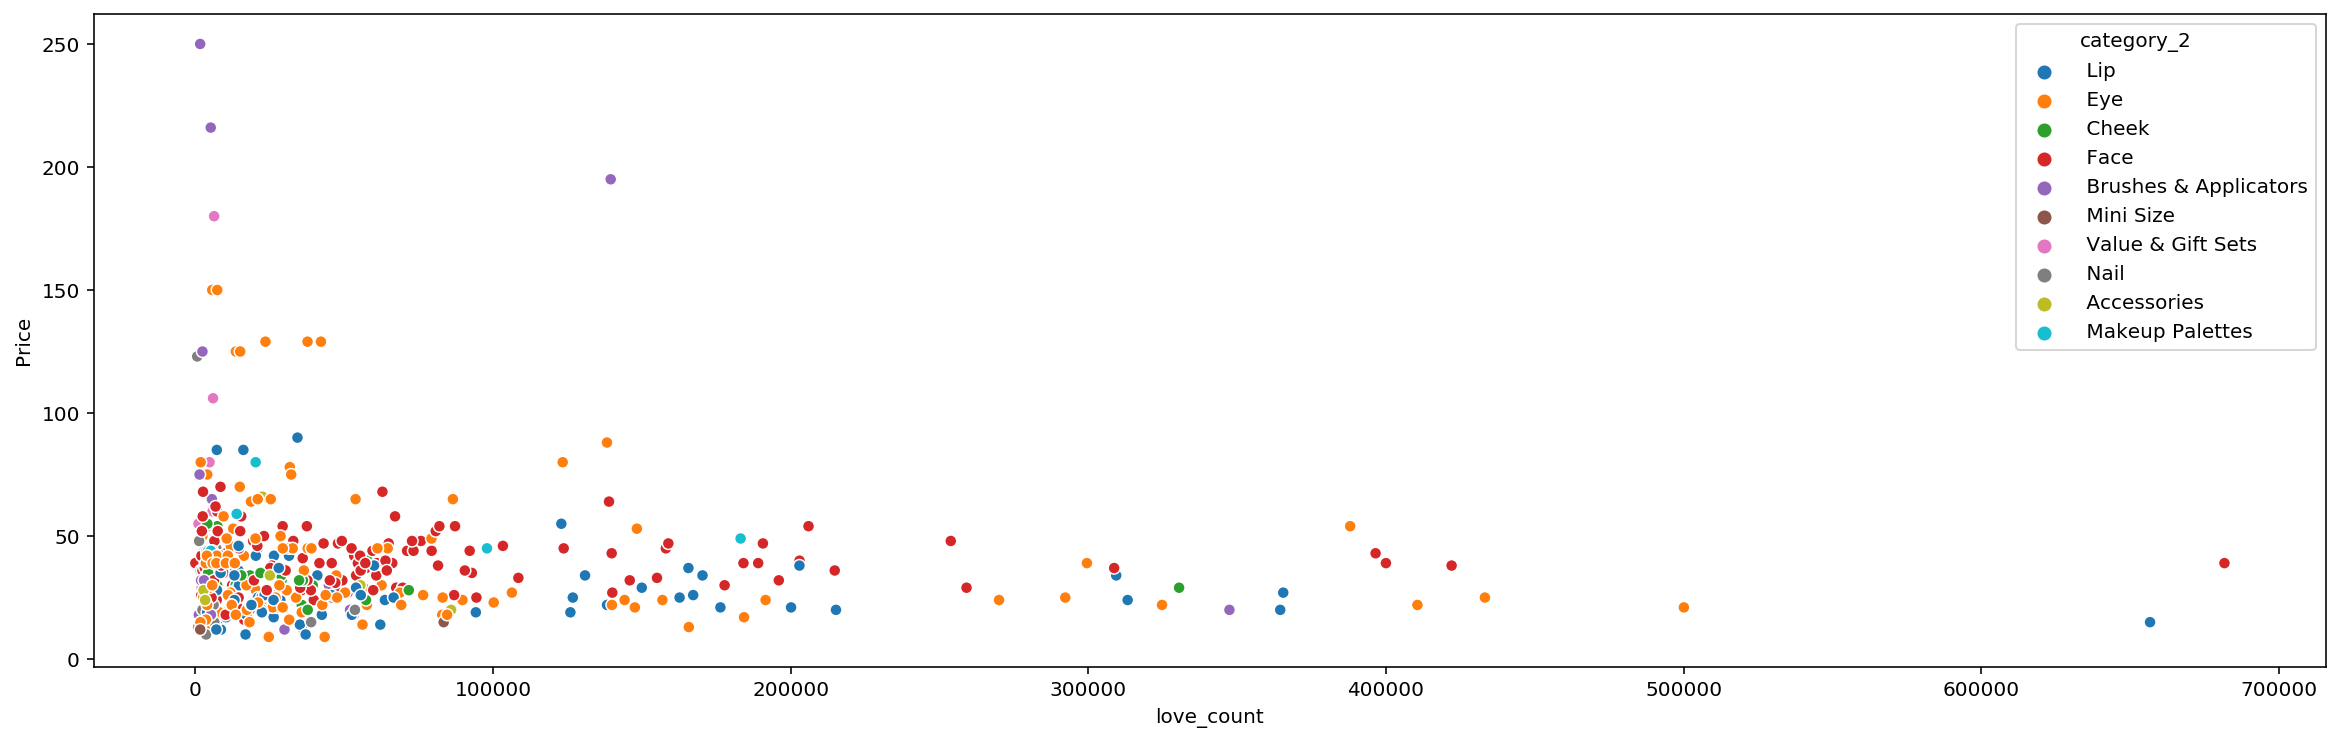

In [11]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=makeup_df, x='love_count', y='Price', hue='category_2')
plt.plot()

It shows that most products with high love counts are priced lower 100 dollars. And High love counts products are basically from "Lip", "Eye" and "Face" these three subcategories.

### Price and review counts

[]

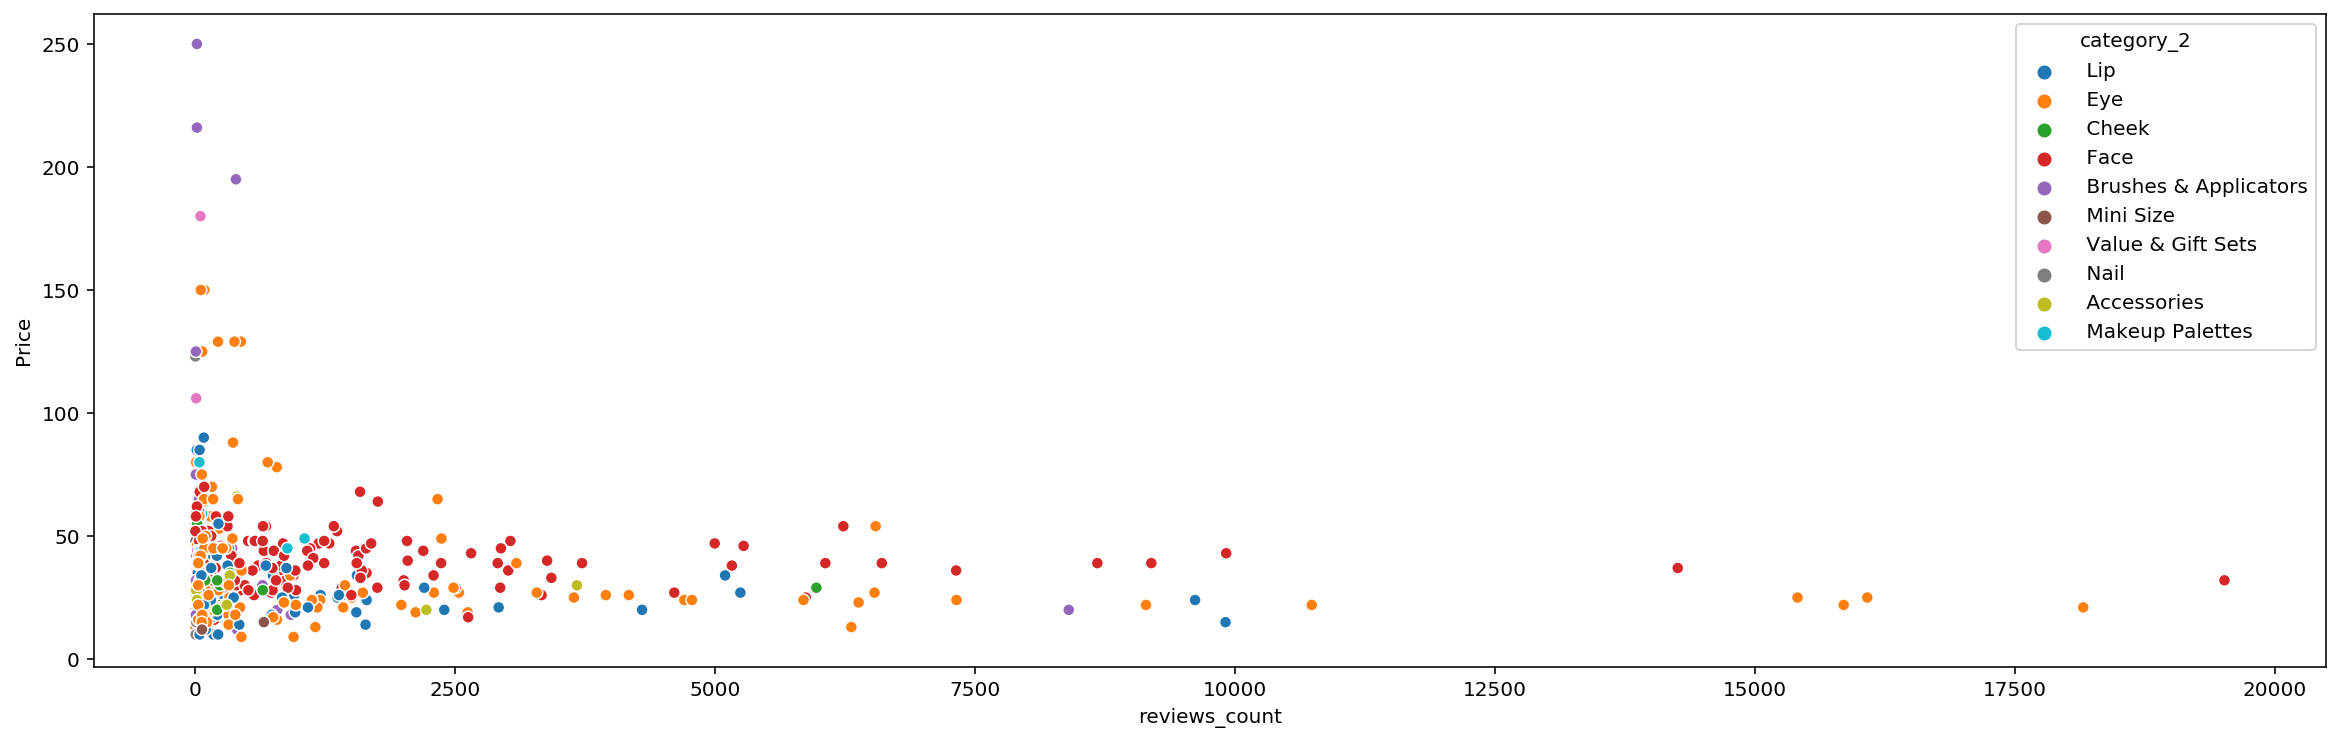

In [12]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=makeup_df, x='reviews_count', y='Price', hue='category_2')
plt.plot()

Reviews are only written by the buyers on Sephora while everyone can add love counts for products. Therefore, the buyers tend to write more reviews for products at lower than 50 dollars, which shows that there may be the most buyers for products at lower than 50 dollars. 

### Price and Ratings

[]

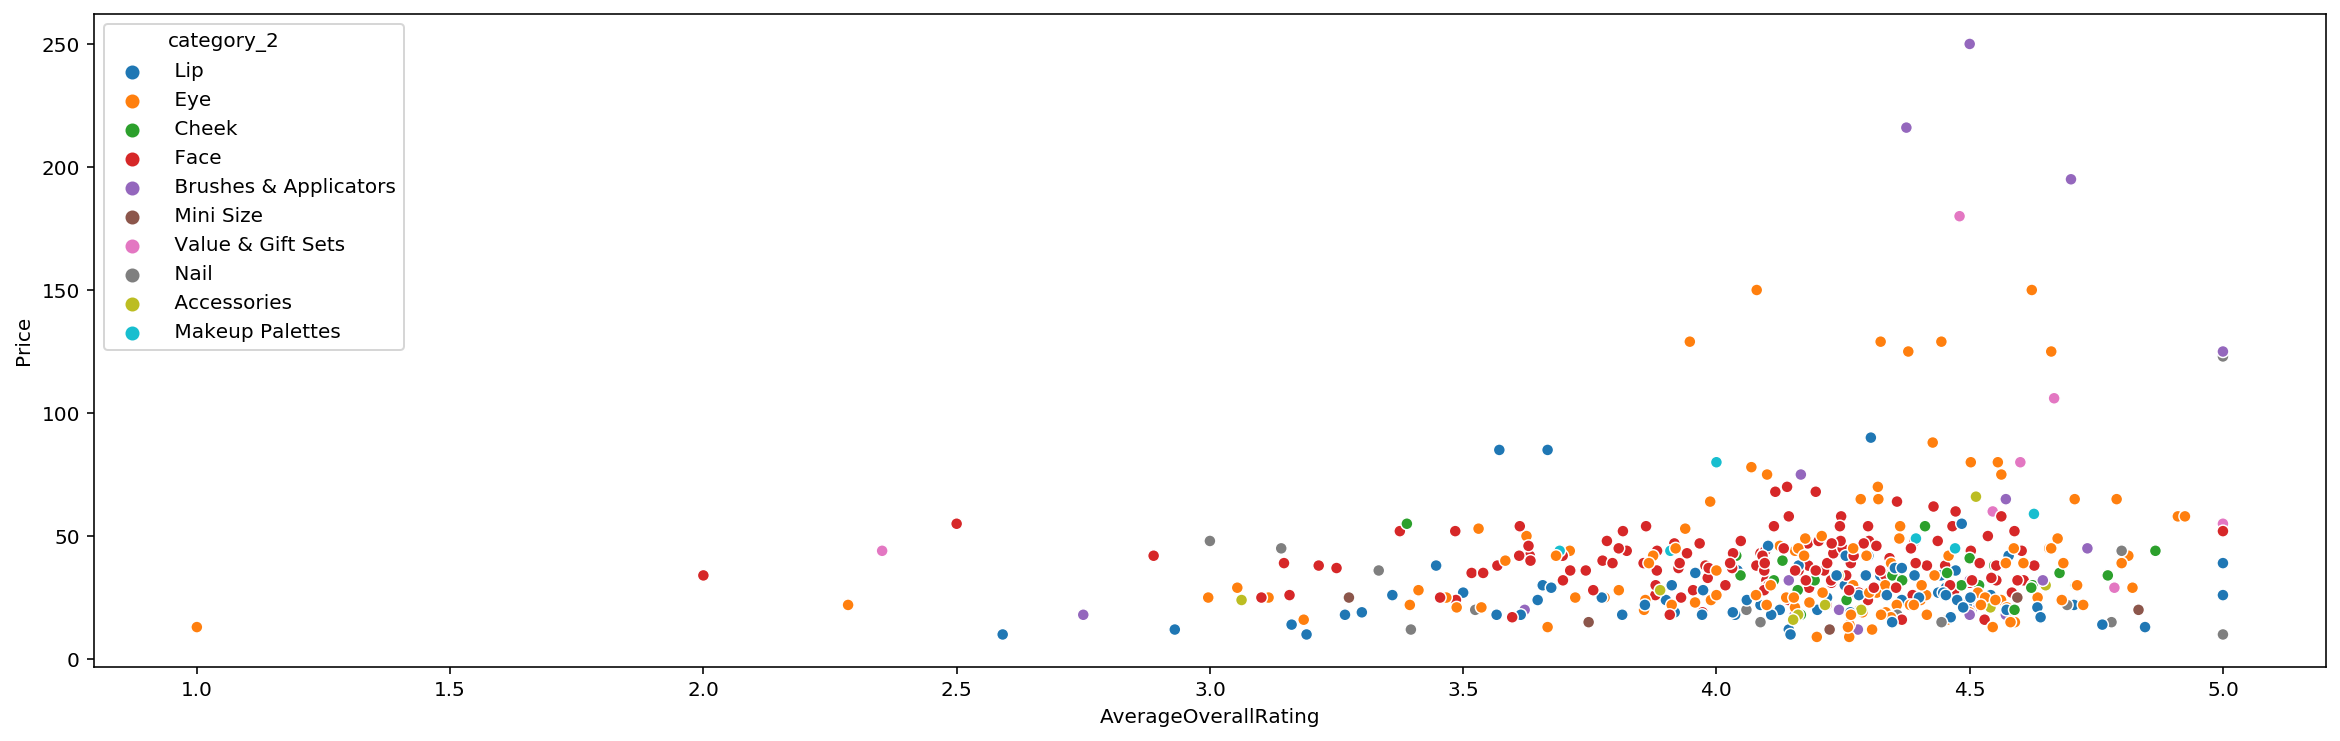

In [13]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=makeup_df, x='AverageOverallRating', y='Price', hue='category_2')
plt.plot()

But at the same time, lower price products will face the risk of low ratings.

### Price and Age group

Based on the price distribution, we can set price group as ["<20", "20-30", "30-40", "40-50", "50-100", "100+"]

In [14]:
makeup_df['Price_Group'] = pd.cut(makeup_df['Price'], 
                                  [0, 20, 30, 40, 50, 100, 999], 
                                  labels=['<20', '20-30', '30-40', 
                                          '40-50', '50-100', '100+'])

/Users/shirley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
price_age = makeup_df.groupby('Price_Group')[['Age_13to17', 'Age_18to24', 'Age_25to34', 
                                              'Age_35to44', 'Age_45to54', 'Age_over54']].sum()
price_age_pct = price_age / price_age.sum()

cm_red = sns.light_palette("Red", as_cmap=True)
price_age_pct = price_age_pct.style.background_gradient(cmap=cm_red)
price_age_pct

,Age_13to17,Age_18to24,Age_25to34,Age_35to44,Age_45to54,Age_over54
Price_Group,,,,,,
<20,0.082340,0.075033,0.075967,0.075355,0.077384,0.084165
20-30,0.550884,0.517322,0.540306,0.561023,0.576590,0.553065
30-40,0.235258,0.246378,0.226120,0.221422,0.225795,0.236721
40-50,0.081885,0.107078,0.102626,0.090957,0.074097,0.082318
50-100,0.048494,0.053424,0.053784,0.049962,0.045159,0.041833
100+,0.001138,0.000764,0.001196,0.001281,0.000975,0.001897


Apparently, products at 20-40 dollars take the most market for each group

In [16]:
age_names = price_age.columns
price_age['Sum'] = price_age.sum(axis=1)
for age_group in age_names:
    price_age[age_group] = price_age[age_group]/price_age['Sum']*100
price_age = price_age.round(2).drop(columns=['Sum'])
price_age = price_age.style.background_gradient(cmap=cm_red)
price_age

,Age_13to17,Age_18to24,Age_25to34,Age_35to44,Age_45to54,Age_over54
Price_Group,,,,,,
<20,4.980000,27.040000,35.280000,15.120000,9.830000,7.740000
20-30,4.710000,26.350000,35.470000,15.920000,10.360000,7.190000
30-40,4.700000,29.310000,34.670000,14.670000,9.470000,7.190000
40-50,3.920000,30.510000,37.700000,14.440000,7.450000,5.990000
50-100,4.390000,28.830000,37.410000,15.020000,8.590000,5.760000
100+,4.730000,18.930000,38.170000,17.670000,8.520000,11.990000


For each price group, Age 18 to 34 are the majority. But relatively, older customers prefer more expensive products while younger group does not show significant preference for each price group.

**Summary**: $\$20$-$\$40$ products win the biggest market and it will also be more competitive at this price. Age group 18-34 will be the major customers for Sephora, and they seem like products with $\$40$ - $\$50$. For a new investment on products that sold on Sephora, My suggestion is to invest on a makeup product priced at $\$40$ - $\$50$.

## Assume we are going to sell a product on Sephora, how to predict its popularity?

We take the sum of review counts and love counts as the criteria to evaluate the popularity of a product.

In [17]:
# To make it more specific, we wish to use unit price instead of price. 
# But before that let's see how many missing size data for the products data 
len(df.loc[(df['size_oz'].isna()) & (df['size_g'].isna()) & (df['size_mL'].isna())])

903

Giving there are too much missing size data, we are going to use price instead of unit price. Since the count of age group is related with the review counts, we should exclude these variables.

### Simple data cleanning

In [18]:
import datetime
df_c = df.copy()
df_c['today'] = datetime.datetime.now()
df_c['Product_History_days'] = df_c['today'] - df_c['FirstSubmissionTime']
df_c['Product_History_days'] = df_c['Product_History_days'].dt.days
df_c['Product_Updated_days'] = df_c['today'] - df_c['LastSubmissionTime']
df_c['Product_Updated_days'] = df_c['Product_Updated_days'].dt.days
df_c['popularity'] = df_c['love_count'] + df_c['reviews_count']
# df_c['length_desc'] = df_c['Description'].str.len()

ml_df = df_c.drop(columns=['size_oz', 'size_g', 'size_mL', 
                           'category', 'pd_id', 'Name', 'reviews_count', 
                           'Description', 'today', 'love_count', 'Age_13to17', 
                           'Age_18to24', 'Age_25to34', 
                           'Age_35to44', 'Age_45to54', 'Age_over54', 
                           'FirstSubmissionTime', 'LastSubmissionTime'])
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 2301 non-null   object 
 1   AverageOverallRating  2301 non-null   float64
 2   Price                 2301 non-null   float64
 3   category_1            2301 non-null   object 
 4   category_2            1765 non-null   object 
 5   category_3            1598 non-null   object 
 6   Product_History_days  2301 non-null   int64  
 7   Product_Updated_days  2301 non-null   int64  
 8   popularity            2301 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 161.9+ KB


### EDA

[]

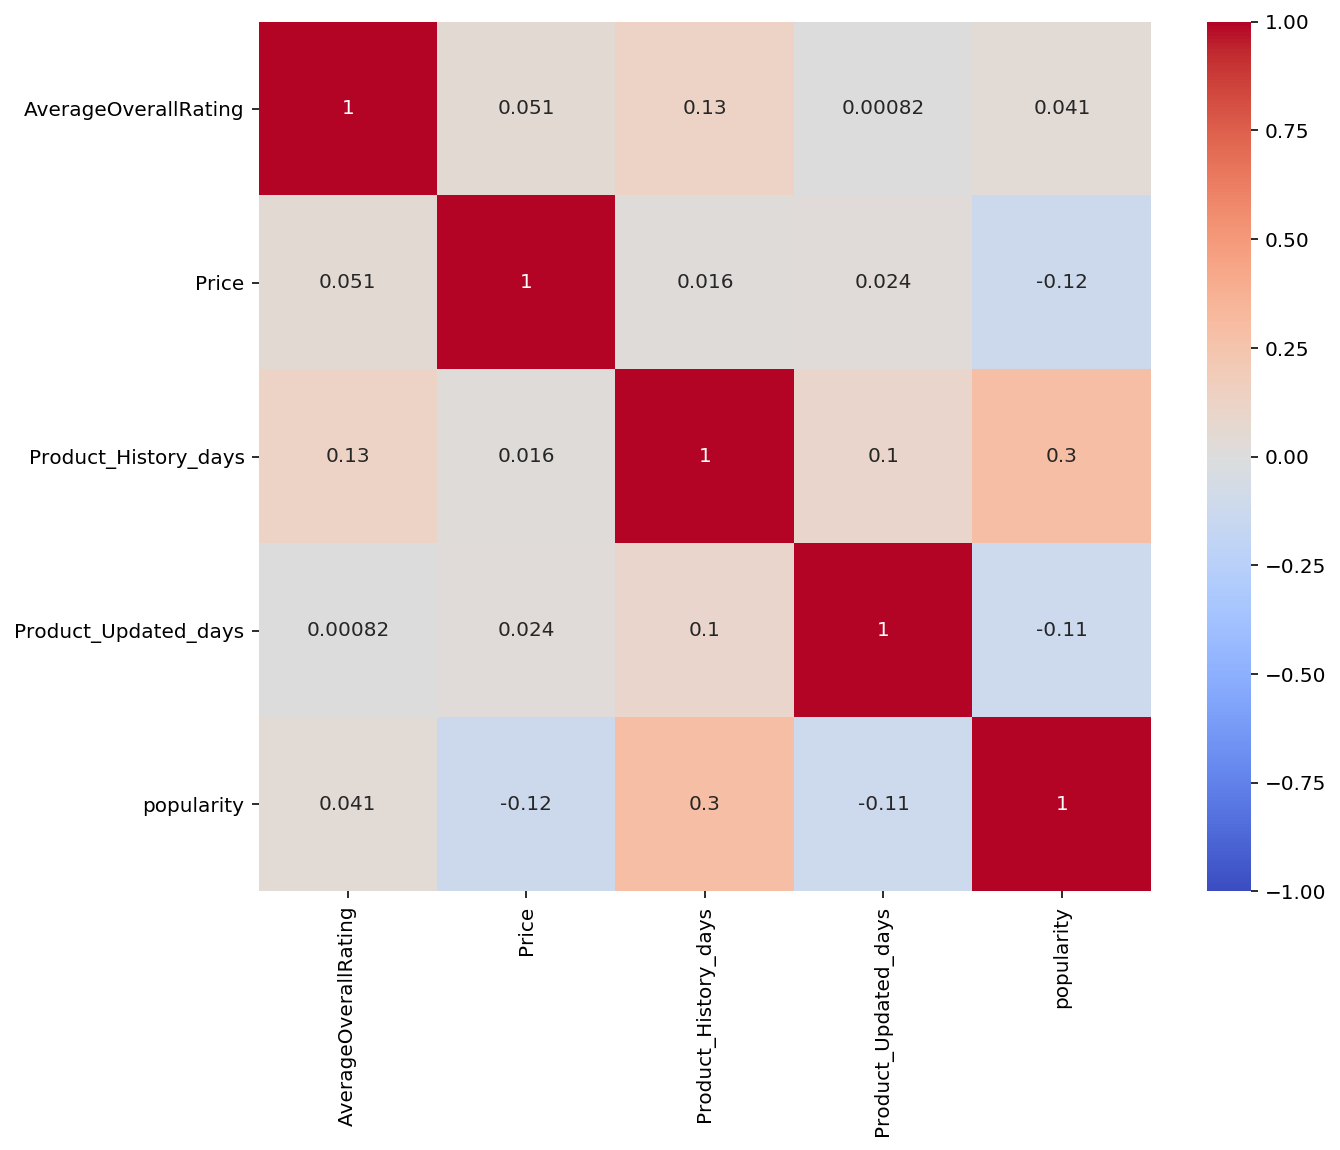

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(ml_df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.plot()

### Data Processing

In [20]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, Normalizer, OrdinalEncoder

from sklearn.model_selection import train_test_split

In [21]:
X_cols = list(ml_df.columns)
y_col = 'popularity'
X_cols.remove(y_col)
X = ml_df[X_cols]
y = ml_df[y_col]

In [22]:
# fill missing data with most frequent values and encode categorical features
categorical_features = ['brand', 'category_1', 'category_2', 'category_3']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder())

# Normalize some numerical features
numeric_features = ['Price', 'Product_History_days', 'Product_Updated_days']
numeric_transformer = make_pipeline(Normalizer())

# Transformer
X_ct = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features), 
                                       ('num', numeric_transformer, numeric_features)], 
                         remainder='passthrough')
X_cols = categorical_features + numeric_features + ['AverageOverallRating']
X = X_ct.fit_transform(X)
X.shape

(2301, 8)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(len(y_train), len(y_val), len(y_test))

1380 460 461


### Building Models

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score

In [25]:
def basic_pipelines():
    
    model_lg = make_pipeline(LinearRegression())
    model_ridge = make_pipeline(Ridge())
    model_Lasso = make_pipeline(Lasso())
    model_knreg = make_pipeline(KNeighborsRegressor())
    model_dt = make_pipeline(DecisionTreeRegressor(random_state=42))
    model_rf = make_pipeline(RandomForestRegressor(n_estimators=20, random_state=42))
    model_gbr = make_pipeline(GradientBoostingRegressor(n_estimators=20, random_state=42))
    model_nn = make_pipeline(MLPRegressor(random_state=42, max_iter=5000))
    
    pipelines = [model_lg, model_ridge, model_Lasso, model_knreg, model_dt, model_rf, model_gbr, model_nn]
    
    return pipelines

In [26]:
# Train all the models
pipelines = basic_pipelines()
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/Users/shirley/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
for pipe in pipelines:
    print(f'Model: {pipe.steps[-1][0]}')
    y_val_pred = pipe.predict(X_val)
    score = r2_score(y_val, y_val_pred)
    print(f'R-squared score: {round(score, 2)}')
    print()

Model: linearregression
R-squared score: 0.06

Model: ridge
R-squared score: 0.06

Model: lasso
R-squared score: 0.06

Model: kneighborsregressor
R-squared score: 0.02

Model: decisiontreeregressor
R-squared score: 0.05

Model: randomforestregressor
R-squared score: 0.21

Model: gradientboostingregressor
R-squared score: 0.16

Model: mlpregressor
R-squared score: 0.03



**Summary**: Random Forest performs well for predicting popularity in this case. Neural network may work too but takes time to train. Therefore for the following part we are going to tune random forest to predict popularity.

### Hyperparamers tunning

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
hyperparameters = dict(n_estimators=np.arange(start=100, stop=300, step=10), 
                       criterion=['mse', 'mae'],
                       min_samples_split=np.arange(start=2, stop=40, step=2),
                       max_features=['auto', 'sqrt','log2'])

In [30]:
rf_grid = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                             param_distributions=hyperparameters, 
                             n_iter=20, 
                             scoring='r2', 
                             verbose=1,
                             n_jobs=-1,
                             cv=3,
                             random_state=42)

In [31]:
rf_grid.fit(X_train, y_train);
print(f"The validation set score - {rf_grid.score(X_val, y_val):.2%}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.2min finished


The validation set score - 19.65%


In [32]:
rf_grid.best_params_

{'n_estimators': 290,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'criterion': 'mse'}

### Best Model

In [33]:
best_model = RandomForestRegressor(n_estimators=290, min_samples_split=8, 
                                   max_features='sqrt', criterion='mse', 
                                   random_state=42)
best_model.fit(X_train, y_train)
print(f'Validation set score: {round(best_model.score(X_val, y_val), 4)*100}%')
print(f'Test set score: {round(best_model.score(X_test, y_test), 4)*100}%')

Validation set score: 19.650000000000002%
Test set score: 34.83%


In [34]:
f_imp_df = pd.DataFrame({'features': X_cols, 'imp': best_model.feature_importances_})
f_imp_df.sort_values('imp', ascending=False)

,features,imp
6,Product_Updated_days,0.252204
5,Product_History_days,0.227432
4,Price,0.133993
0,brand,0.089993
7,AverageOverallRating,0.089076
2,category_2,0.078544
1,category_1,0.068889
3,category_3,0.059869
